In the previous two notebooks, we did some basic initial exploration of the data, and then we cleaned the data to remove any null values. The next step is to do further exploration of the data to gain some ideas as to what variables seem most important and also which ones might be correlated with one another. From our results, we may also create new features - this later step is called feature engineering.

The following code block just cleans our data set - it uses the same steps found in part 2. See part 2 for expanations and justifications for those steps.

In [1]:
#setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

train_df.drop('Cabin', 1, inplace=True)
test_df.drop('Cabin', 1, inplace=True)
train_df.drop('Ticket', 1, inplace=True)
test_df.drop('Ticket', 1, inplace=True)
train_df.drop('PassengerId', 1, inplace=True)
test_df.drop('PassengerId', 1, inplace=True)
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)
train_df['Embarked'].fillna("S",inplace=True)

In [2]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


We notice that our data set contains categorical data for name, sex, and embarked. For our numerical analysis, we will have to convert the categorical variables to numerical numbers. By using the pandas get_dummies function, we create new columns for Sex_female, Sex_male, Embarked_C, Embarked_Q, and Embarked_S. We add those columns to our dataframe, and delete the now-redundant columns, "Sex" and "Embarked." 

In [3]:
df_sex = pd.get_dummies(train_df[['Sex']])
df_embarked = pd.get_dummies(train_df[['Embarked']])
train_new = pd.concat([train_df,df_sex,df_embarked],axis=1)
train_new.drop('Sex',1,inplace=True)
train_new.drop('Embarked',1,inplace=True)

In [4]:
train_new.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1


To keep our changes consistent, we perform the same transformations that we did on the training set also on the test set.

In [5]:
df_sex_test = pd.get_dummies(test_df[['Sex']])
df_embarked_test = pd.get_dummies(test_df[['Embarked']])
test_new = pd.concat([test_df,df_sex_test,df_embarked_test],axis=1)
test_new.drop('Sex',1,inplace=True)
test_new.drop('Embarked',1,inplace=True)

Let's look at the embarked class categories to see if there is any correlation between port of embarkation and survival.

Survived      0    1
Embarked_C          
0           474  249
1            75   93
Survived      0    1
Embarked_Q          
0           502  312
1            47   30


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Survived      0    1
Embarked_S          
0           122  123
1           427  219


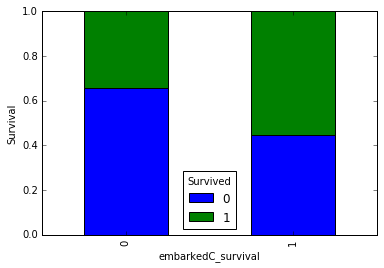

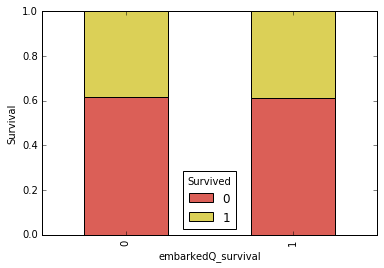

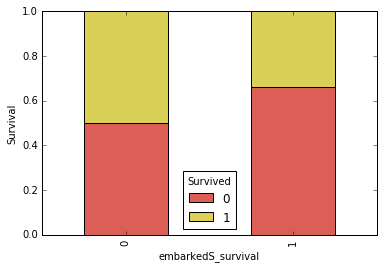

In [6]:
embarkedC_survival= pd.crosstab(train_new['Embarked_C'], train_new['Survived'])
print (embarkedC_survival)
embarkedC_survival_graph = embarkedC_survival.div(embarkedC_survival.sum(1).astype(float),axis=0)
embarkedC_survival_graph.plot(kind="bar", stacked=True)
current_palette = sns.color_palette("hls",7)
#current_palette = sns.color_palette("Paired")
sns.set_palette(current_palette)
embarkedC_survival_graph = plt.xlabel('embarkedC_survival')
embarkedC_survival_graph = plt.ylabel('Survival')

embarkedQ_survival= pd.crosstab(train_new['Embarked_Q'], train_new['Survived'])
print (embarkedQ_survival)
embarkedQ_survival_graph = embarkedQ_survival.div(embarkedQ_survival.sum(1).astype(float),axis=0)
sns.set_palette(current_palette)
embarkedQ_survival_graph.plot(kind="bar", stacked=True)
embarkedQ_survival_graph = plt.xlabel('embarkedQ_survival')
embarkedQ_survival_graph = plt.ylabel('Survival')

embarkedS_survival= pd.crosstab(train_new['Embarked_S'], train_new['Survived'])
print (embarkedS_survival)
embarkedS_survival_graph = embarkedS_survival.div(embarkedS_survival.sum(1).astype(float),axis=0)
embarkedS_survival_graph.plot(kind="bar", stacked=True)
embarkedS_survival_graph = plt.xlabel('embarkedS_survival')
embarkedS_survival_graph = plt.ylabel('Survival')

It seems like the port at which one embarked does not show a strong correlation with survival. So, let's drop this feature.

In [7]:
test_new.drop('Embarked_C',1,inplace=True)
test_new.drop('Embarked_Q',1,inplace=True)
test_new.drop('Embarked_S',1,inplace=True)

train_new.drop('Embarked_C',1,inplace=True)
train_new.drop('Embarked_Q',1,inplace=True)
train_new.drop('Embarked_S',1,inplace=True)

Next, let's look at some possible correlations. An often used graphing method is a heatmap, which plots the correlation coefficients between variables.

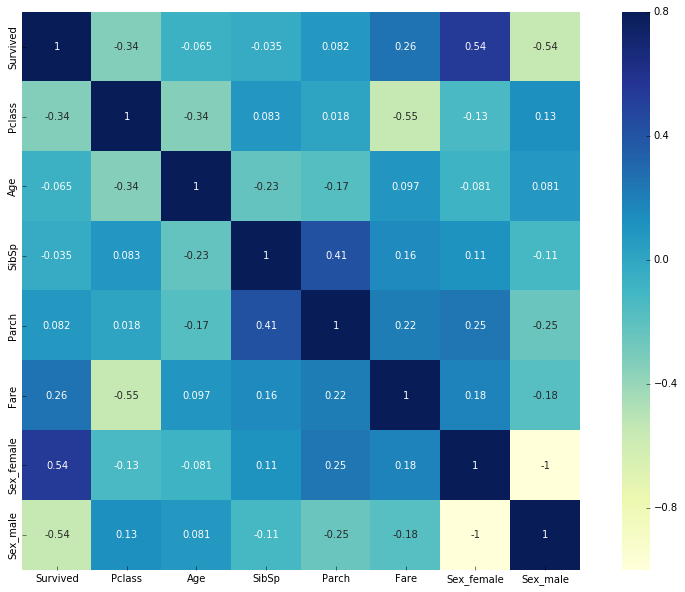

In [8]:
plt.subplots(figsize=(15,10))
sns.heatmap(train_new.corr(), vmax=0.8,square=True,annot=True,cmap="YlGnBu")

We see that a strong correlation whether someone was female and whether they survived. We also see a correlation between fare and survival - it seems that people who paid higher fares are more likely to have survived.

We still haven't finished our conversion of categorical data to numerical data. The variable "Name" remains. We'll borrow from the kaggle tutorial by [Ahmed Besbes](https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html) a line of code for the function below, here we've called the function "extract_title," to get the title from the Name of each passenger. We'll also drop the "Name" category from our dataframes and take a quick look at the first few rows of the dataframe to make sure everything went well.


In [9]:
def extract_title():
    train_new['Title'] = train_new['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    test_new['Title'] = test_new['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

extract_title()
train_new.drop('Name',1,inplace=True)
test_new.drop('Name',1,inplace=True)

train_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title
0,0,3,22.0,1,0,7.2500,0,1,Mr
1,1,1,38.0,1,0,71.2833,1,0,Mrs
2,1,3,26.0,0,0,7.9250,1,0,Miss
3,1,1,35.0,1,0,53.1000,1,0,Mrs
4,0,3,35.0,0,0,8.0500,0,1,Mr


We thus created a new feature called "Title," but it is still categorical. We'll have to make a decision about how we will convert this feature to a numerical value. From our previous data explorations, we saw a correlation between survival rate and being female. Let's look at how being female correlates with survival.

Survived      0    1
Sex_female          
0           468  109
1            81  233


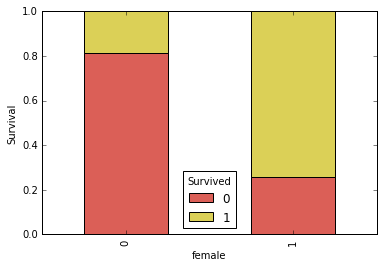

In [10]:
female_survival= pd.crosstab(train_new['Sex_female'], train_new['Survived'])
print (female_survival)
female_survival_graph = female_survival.div(female_survival.sum(1).astype(float),axis=0)
female_survival_graph.plot(kind="bar", stacked=True)
female_survival_graph = plt.xlabel('female')
female_survival_graph = plt.ylabel('Survival')

We see that females tended to have a higher survival rate than males. How about the subcategory of married females? Let's create a new feature for "married female." To do so, we will need to extract the subset of females who are married from our dataset. 

In [11]:
def extractMrs():
    married_female = []
    for i in train_new['Title']:
        if i == "Mrs":
            married_female.append(1)
        else:
            married_female.append(0)
    train_new['married_female'] = married_female
    
    married_female_test = []
    for i in test_new['Title']:
        if i == "Mrs":
            married_female_test.append(1)
        else:
            married_female_test.append(0)
    test_new['married_female_test'] = married_female_test
    
    
extractMrs()
train_new.drop('Title',1,inplace=True)
test_new.drop('Title',1,inplace=True)

train_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,married_female
0,0,3,22.0,1,0,7.2500,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,1
2,1,3,26.0,0,0,7.9250,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,1,0


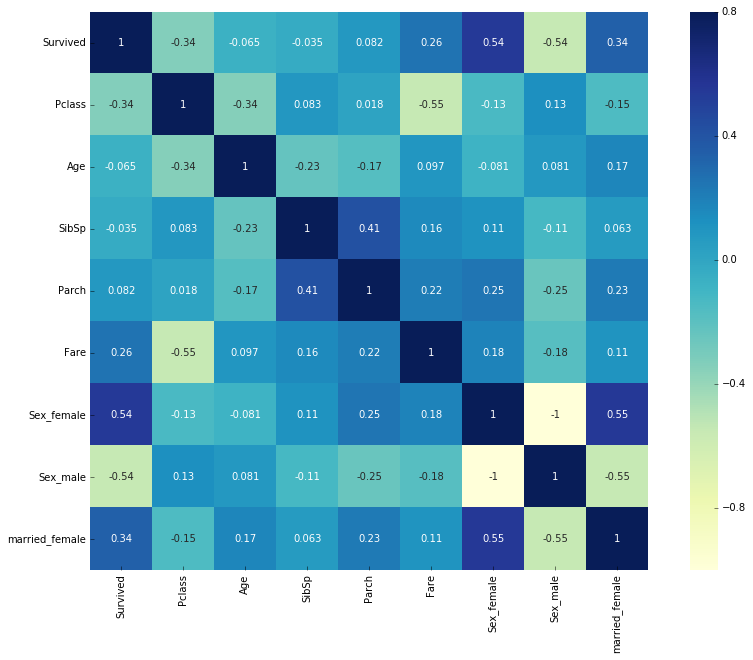

In [12]:
plt.subplots(figsize=(15,10))
sns.heatmap(train_new.corr(), vmax=0.8,square=True,annot=True,cmap="YlGnBu")

Let's use the pandas function crosstab to see survival rates of married females vs. all other passengers, and then plot the results.

Survived          0    1
married_female          
0               523  243
1                26   99


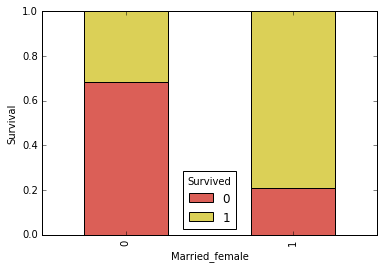

In [13]:
married_female_survival= pd.crosstab(train_new['married_female'], train_new['Survived'])
print (married_female_survival)
married_female_survival_graph = married_female_survival.div(married_female_survival.sum(1).astype(float),axis=0)
married_female_survival_graph.plot(kind="bar", stacked=True)

#current_palette = sns.color_palette("hls",7)
current_palette = sns.color_palette("Paired")
sns.set_palette(current_palette)
married_female_survival_graph = plt.xlabel('Married_female')
married_female_survival_graph = plt.ylabel('Survival')

Let's also create another feature to test whether individuals or families were more likely to survive. We create the variable "Alone" to capture individuals who were traveling alone, and also create a variable for large families to capture families with more than 3 people.

In [14]:
train_new["FamilySize"] = train_new['Parch'] + train_new['SibSp'] + 1
test_new["FamilySize"] = test_new['Parch'] + test_new['SibSp'] + 1

In [15]:
def travelAlone():
    travelAlonePassenger = []
    for i in train_new["FamilySize"]:
        if i == 1:
            travelAlonePassenger.append(1)
        else:
            travelAlonePassenger.append(0)
    train_new["travelAlonePassenger"] = travelAlonePassenger
    
    travelAlonePassenger_test = []
    for i in test_new["FamilySize"]:
        if i == 1:
            travelAlonePassenger_test.append(1)
        else:
            travelAlonePassenger_test.append(0)
    test_new["travelAlonePassenger"] = travelAlonePassenger_test

def bigFamily():
    bigFamilyPassenger = []
    for i in train_new["FamilySize"]:
        if i > 3:
            bigFamilyPassenger.append(1)
        else:
            bigFamilyPassenger.append(0)
    train_new["bigFamilyPassenger"] = bigFamilyPassenger
    
    bigFamilyPassenger_test = []
    for i in test_new["FamilySize"]:
        if i > 3:
            bigFamilyPassenger_test.append(1)
        else:
            bigFamilyPassenger_test.append(0)
    test_new["bigFamilyPassenger"] = bigFamilyPassenger_test
    
travelAlone()
bigFamily()
train_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,married_female,FamilySize,travelAlonePassenger,bigFamilyPassenger
0,0,3,22.0,1,0,7.2500,0,1,0,2,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,2,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,1,0,1,2,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,1,1,0


Let's look again at a heatmap of the correlations for our new features.

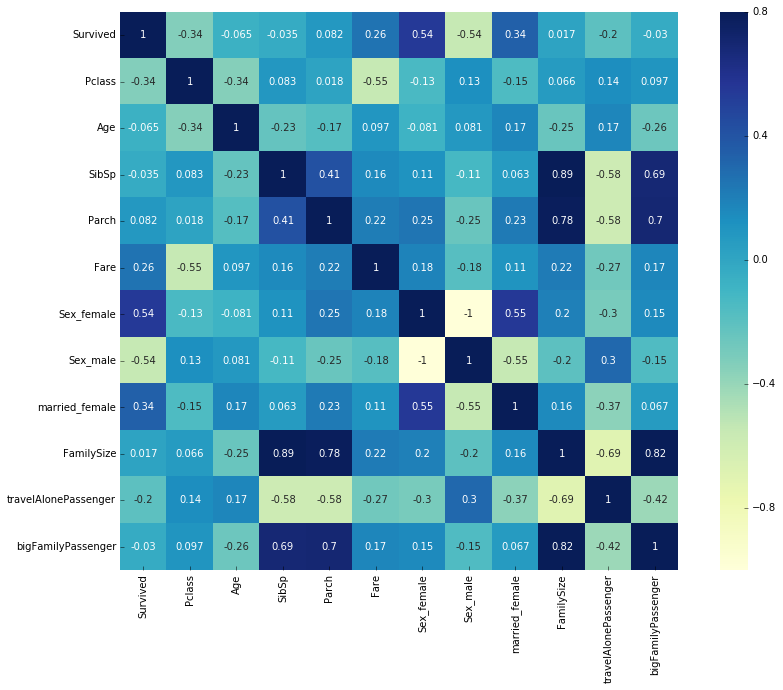

In [16]:
plt.subplots(figsize=(15,10))
sns.heatmap(train_new.corr(), vmax=0.8,square=True,annot=True,cmap="YlGnBu")

What does the distribution of fares look like? We can use the describe() function to get information on the Fare column, and also create a histogram of the values.

In [17]:
train_new['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

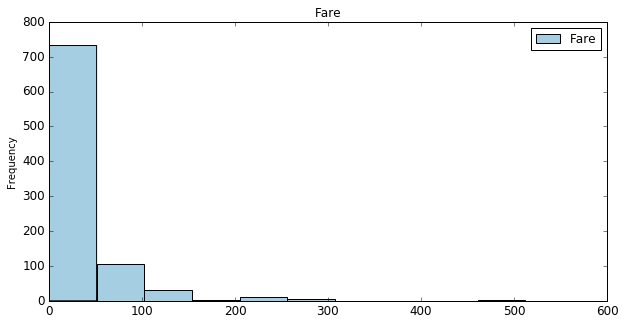

In [18]:
age_plot=train_new['Fare'].plot(kind='hist',title='Fare',figsize=(10,5),legend=True,fontsize=12)

Let's look at the correlation between Fare and PClass. Does Fare give us any information that is not captured by PClass?

In [19]:
train_new['Pclass'].corr(train_new['Fare'])

-0.54949961994390639

Let's look at the ranges of fares that passengers in different Pclasses paid. THe graphs below are histograms of the fares paid, grouped by the Pclass of the passenger.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1524eec50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff152346358>]], dtype=object)

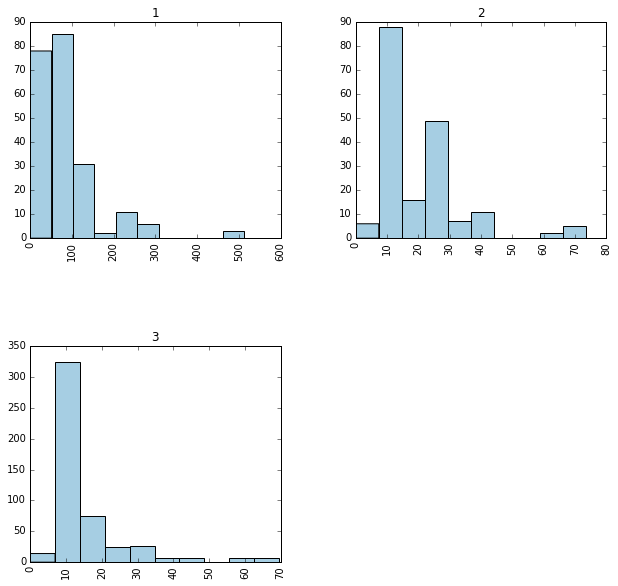

In [20]:
train_new.hist(by='Pclass',column='Fare',figsize=(10,10))

From the graphs separating fares based on Pclass, we see that although there was a spread in the fares for each class, Pclass 1 fares were much higher than that of other classes. We also see that there were some individuals in Pclasses 2 and 3 who paid in general higher fares than others. Let's create a new feature fares that were at least 20.

In [22]:
def ticketFareThreshold():
    ticketFareThreshold = []
    for i in train_new["Fare"]:
        if i > 20:
            ticketFareThreshold.append(1)
        else:
            ticketFareThreshold.append(0)
    train_new["ticketFareThreshold"] = ticketFareThreshold
    
    ticketFareThreshold_test = []
    for i in test_new["Fare"]:
        if i > 20:
            ticketFareThreshold_test.append(1)
        else:
            ticketFareThreshold_test.append(0)
    test_new["ticketFareThreshold"] = ticketFareThreshold_test

ticketFareThreshold()
train_new.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,married_female,FamilySize,travelAlonePassenger,bigFamilyPassenger,ticketFareThreshold
0,0,3,22.0,1,0,7.2500,0,1,0,2,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,2,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,1,2,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1,1,0,0
